<a href="https://colab.research.google.com/github/medhhaa/Statistics/blob/main/Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# import libraries
import numpy as np
import statistics

# for vizulaization
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

## Measures of Central Tendency
1. Mean
2. Median
3. Mode

In [37]:
ages = [21, 23, 24, 22, 25, 29, 28, 29, 26, 28, 27, 25, 24, 21, 24, 57, 150]

In [38]:
# using numpy
print(np.mean(ages))
print(np.median(ages))

34.294117647058826
25.0


In [39]:
# using statistics
# mode is specifically used where there are categorical variables
statistics.mode(ages)

24

After adding outlier 150 to ages, mean increased from 26 to 34, but mode remained the same. Mode is more immune to outliers.


<Axes: >

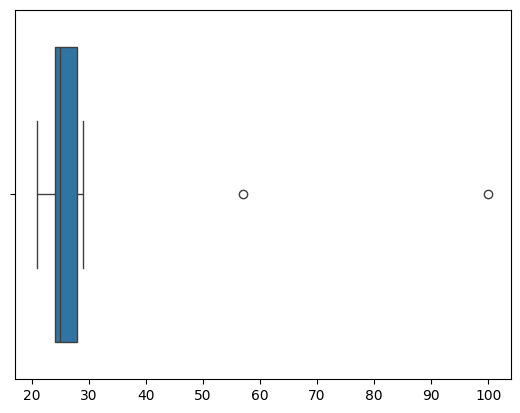

In [36]:
sns.boxplot(x=ages)

## 5 Number Summary

In [43]:
q1, q3 = np.percentile(ages, [25, 75])
print(q1, q3)

24.0 28.0


In [44]:
# to check outlier: [lower bound - higher bound]
IQR = q3 - q1
print(IQR)

lower_bound = q1 - (1.5 * IQR)
higher_bound = q3 + (1.5 * IQR)
print(lower_bound, higher_bound)

4.0
18.0 34.0


## Measure of Dispersion
1. Variance
2. Standard Deviation

In [52]:
# statistics uses sample variance (divided by n-1)
print("Sample Variance: ", statistics.variance(ages))

# pvariance is population variance
print("Population Variance: ", statistics.pvariance(ages))

Sample Variance:  955.2205882352941
Population Variance:  899.0311418685121


In [48]:
# Population variance (divided by n)
np.var(ages, axis = 0)

np.float64(899.0311418685121)

In [51]:
# degree of freedom (dof): 0 for population variance
def variance(data, dof = 0):
    n = len(data)
    # mean of the data
    mean = sum(data) / n

    # variance
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / (n-dof)
    return variance

print("Population Variance: ", variance(ages))
print("Sample variance: ", variance(ages, dof = 1))

Population Variance:  899.0311418685121
Sample variance:  955.2205882352941


##Histogram and PDFs

<Axes: ylabel='Count'>

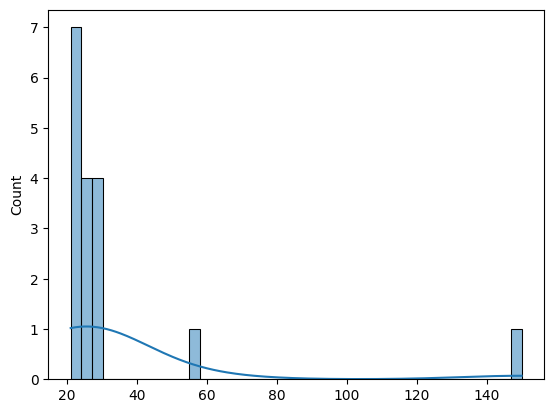

In [59]:
sns.histplot(ages, kde = True)

In [60]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

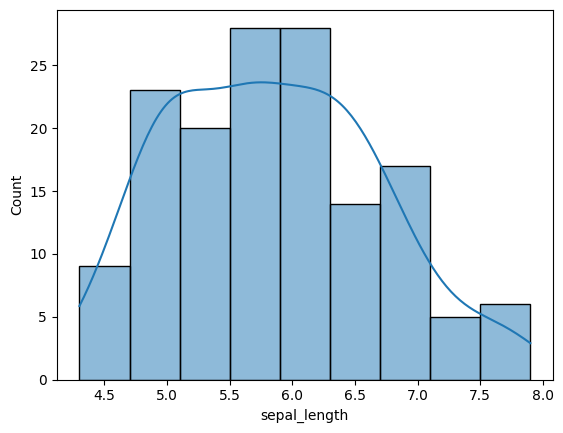

In [61]:
sns.histplot(df['sepal_length'], kde = True)

<Axes: xlabel='sepal_width', ylabel='Count'>

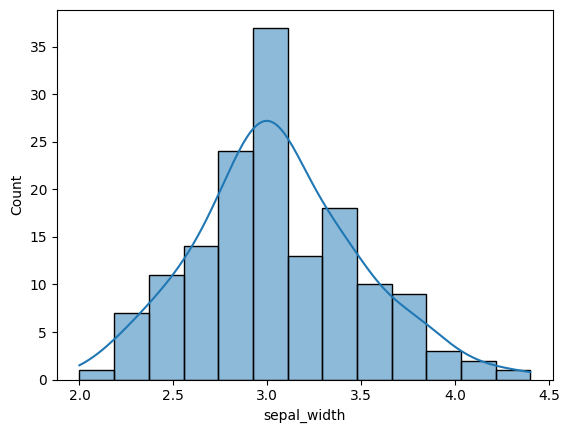

In [62]:
sns.histplot(df['sepal_width'], kde = True)

<Axes: xlabel='petal_length', ylabel='Count'>

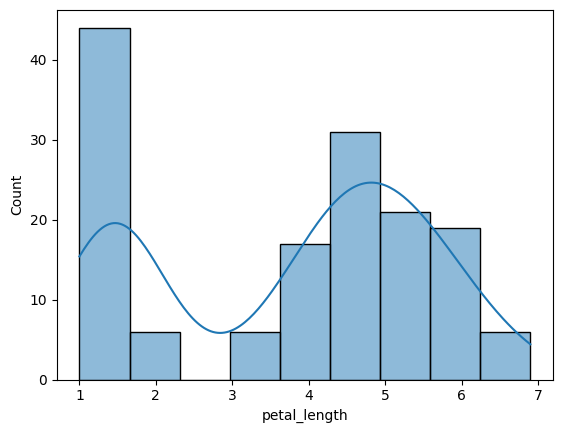

In [63]:
sns.histplot(df['petal_length'], kde = True)

In [79]:
# Create a normal distribution
s = np.random.normal(0.5, 0.2, 1000)
# normal(loc [mean/center of distribution], scale, number )
s

array([ 5.76047090e-01,  4.03606479e-01,  3.27107043e-01,  9.32376582e-01,
        4.65614810e-01,  3.38264958e-01,  2.84310584e-01,  3.49487065e-01,
        7.54312326e-01,  2.02549550e-01,  5.00583056e-01,  5.61120931e-01,
        3.60064321e-02,  2.04195192e-01, -9.57147082e-02,  1.91110986e-01,
        6.90502357e-01,  6.80046554e-01,  4.55884356e-01,  5.46022211e-01,
        3.92598127e-01,  7.64703612e-01,  8.15685562e-01,  3.84678670e-01,
        7.25371717e-01,  4.18814836e-01,  5.23888823e-01,  7.83838513e-01,
        4.22930191e-01,  3.18657552e-01,  2.14465922e-01,  6.69792925e-01,
        1.60680939e-01,  5.93953759e-01,  6.06993233e-01,  8.31770379e-01,
        4.83664812e-01,  2.15117810e-01,  2.84378641e-01,  6.33532983e-01,
        5.24912623e-01,  6.06939897e-01,  5.93520910e-01,  4.56107088e-01,
        4.84894468e-01,  3.88528584e-01,  3.45639466e-01,  3.63695770e-01,
        5.92359076e-01,  4.04594620e-01,  3.59575311e-01,  7.15218870e-01,
        2.19449410e-01,  

<Axes: ylabel='Count'>

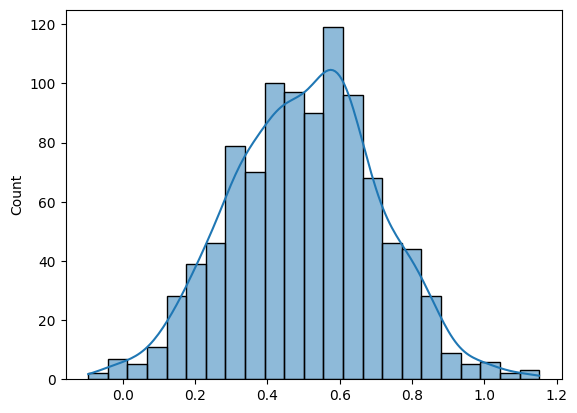

In [80]:
sns.histplot(s, kde = True)

## Other Distribution
## Log Normal Distribution, Power Law Distribution

<Axes: ylabel='Count'>

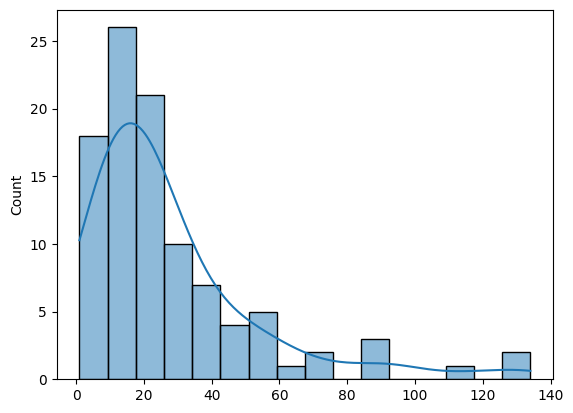

In [85]:
mu, sigma = 3., 1.
s = np.random.lognormal(mu, sigma, 100)
sns.histplot(s, kde = True)

<Axes: ylabel='Count'>

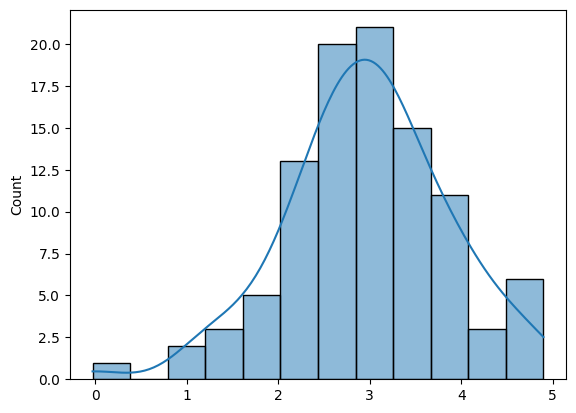

In [89]:
sns.histplot(np.log(s), kde = True)

 ## Check whether the distribution is normal

In [98]:
# To. heck whether the feature is normal / gaussian
# QQ-Plot
def plot_sample(data):
  plt.figure(figsize = (10, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(data, kde = True)
  plt.subplot(1, 2, 2)
  stats.probplot(data, dist = "norm", plot = pylab)
  plt.show()

def plot_log_sample(data):
  plt.figure(figsize = (10, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(np.log(data), kde = True)
  plt.subplot(1, 2, 2)
  stats.probplot(np.log(data), dist = "norm", plot = pylab)
  plt.show()

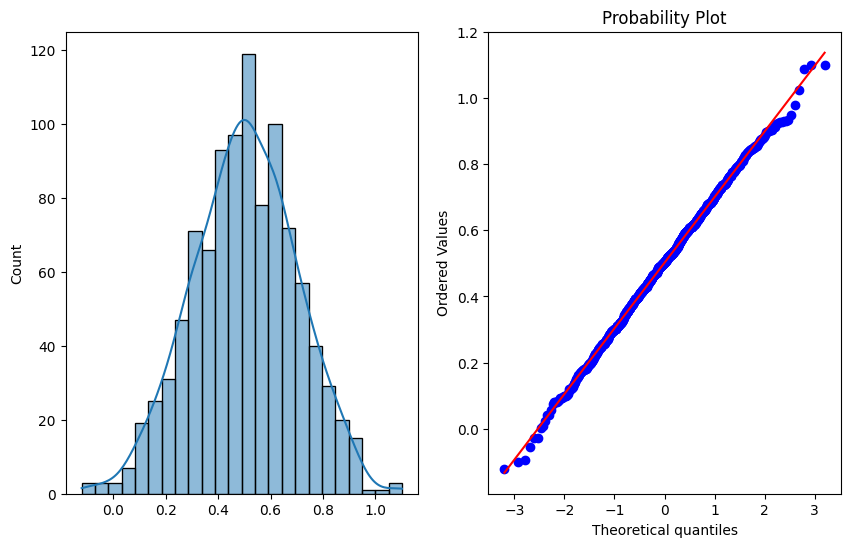

In [94]:
# Create a normal distributed data:
s = np.random.normal(0.5, 0.2, 1000)
plot_sample(s)

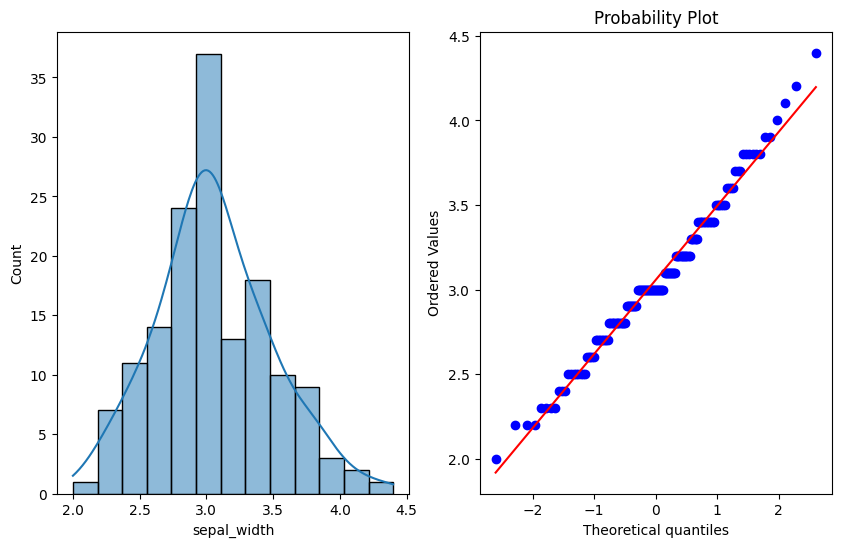

In [95]:
plot_sample(df['sepal_width'])

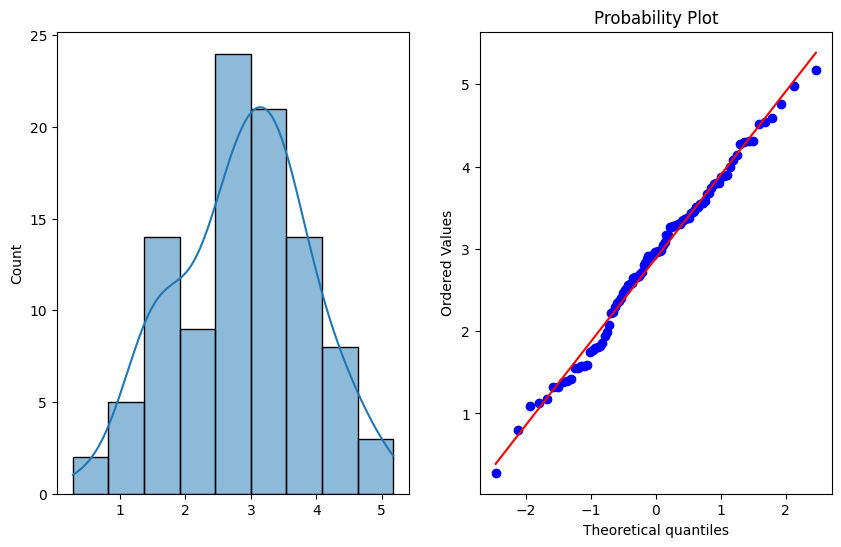

In [99]:
mu, sigma = 3., 1.
s = np.random.lognormal(mu, sigma, 100)
plot_log_sample(s)